In [1]:
import tensorflow as tf

In [2]:
from tensorflow import keras

In [3]:
import numpy as np

In [4]:
import matplotlib.pyplot as plt

In [5]:
print(tf.__version__)

1.13.1


In [6]:
Mnist= tf.keras.datasets.mnist

In [7]:
(train_images, train_labels),(test_images, test_labels)=Mnist.load_data ()

In [8]:
class_names = ['zero', 'one', 'two', 'three', 'four', 
               'five', 'six', 'seven', 'eight', 'nine']

In [9]:
train_images.shape

(60000, 28, 28)

In [10]:
len(train_labels)

60000

In [11]:
train_labels

array([5, 0, 4, ..., 5, 6, 8], dtype=uint8)

In [12]:
test_images.shape

(10000, 28, 28)

In [13]:
len(test_labels)

10000

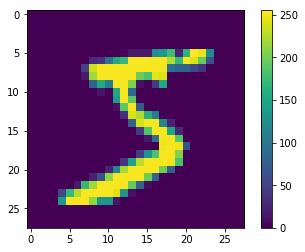

In [14]:
plt.figure()
plt.imshow(train_images[0])
plt.colorbar()
plt.grid(False)
plt.show()

In [15]:
train_images = train_images / 255.0

test_images = test_images / 255.0

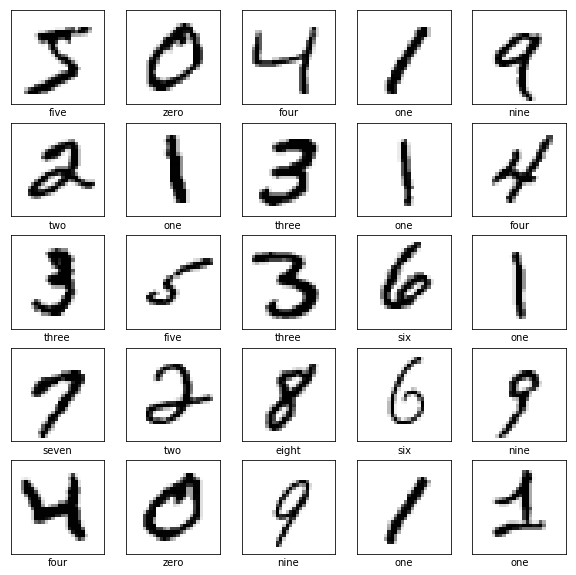

In [16]:
plt.figure(figsize=(10,10))
for i in range(25):
    plt.subplot(5,5,i+1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    plt.imshow(train_images[i], cmap=plt.cm.binary)
    plt.xlabel(class_names[train_labels[i]])
plt.show()

In [17]:
model = keras.Sequential([
    keras.layers.Flatten(input_shape=(28, 28)),
    keras.layers.Dense(128, activation=tf.nn.relu),
    keras.layers.Dense(10, activation=tf.nn.softmax)
])

Instructions for updating:
Colocations handled automatically by placer.


In [18]:
model.compile(optimizer='adam', 
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

In [19]:
model.fit(train_images, train_labels, epochs=10)

Epoch 1/10
60000/60000 [==============================] - 4s 70us/sample - loss: 0.2609 - acc: 0.9265
Epoch 2/10
60000/60000 [==============================] - 4s 73us/sample - loss: 0.1140 - acc: 0.9661
Epoch 3/10
60000/60000 [==============================] - 4s 70us/sample - loss: 0.0788 - acc: 0.9766
Epoch 4/10
60000/60000 [==============================] - 4s 68us/sample - loss: 0.0585 - acc: 0.9818
Epoch 5/10
60000/60000 [==============================] - 4s 68us/sample - loss: 0.0450 - acc: 0.9858
Epoch 6/10
60000/60000 [==============================] - 4s 74us/sample - loss: 0.0357 - acc: 0.9887
Epoch 7/10
60000/60000 [==============================] - 4s 69us/sample - loss: 0.0288 - acc: 0.9909
Epoch 8/10
60000/60000 [==============================] - 4s 72us/sample - loss: 0.0229 - acc: 0.9930
Epoch 9/10
60000/60000 [==============================] - 4s 71us/sample - loss: 0.0184 - acc: 0.9947
Epoch 10/10
60000/60000 [==============================] - 4s 72us/sample - loss: 

In [20]:
test_loss, test_acc = model.evaluate(test_images, test_labels)

print('Test accuracy:', test_acc)

10000/10000 [==============================] - 0s 29us/sample - loss: 0.0815 - acc: 0.9796
Test accuracy: 0.9796


In [21]:
predictions = model.predict(test_images)

In [22]:
predictions[0]

array([1.0442481e-10, 6.7817446e-10, 1.3725034e-08, 1.7335483e-06,
       1.7459615e-16, 4.9335563e-10, 1.8482712e-17, 9.9999774e-01,
       1.8827576e-08, 4.0978804e-07], dtype=float32)

In [23]:
np.argmax(predictions[0])

7

In [24]:
test_labels[0]

7

In [25]:
def plot_image(i, predictions_array, true_label, img):
  predictions_array, true_label, img = predictions_array[i], true_label[i], img[i]
  plt.grid(False)
  plt.xticks([])
  plt.yticks([])
  
  plt.imshow(img, cmap=plt.cm.binary)

  predicted_label = np.argmax(predictions_array)
  if predicted_label == true_label:
    color = 'blue'
  else:
    color = 'red'
  
  plt.xlabel("{} {:2.0f}% ({})".format(class_names[predicted_label],
                                100*np.max(predictions_array),
                                class_names[true_label]),
                                color=color)

def plot_value_array(i, predictions_array, true_label):
  predictions_array, true_label = predictions_array[i], true_label[i]
  plt.grid(False)
  plt.xticks([])
  plt.yticks([])
  thisplot = plt.bar(range(10), predictions_array, color="#777777")
  plt.ylim([0, 1]) 
  predicted_label = np.argmax(predictions_array)
 
  thisplot[predicted_label].set_color('red')
  thisplot[true_label].set_color('blue')

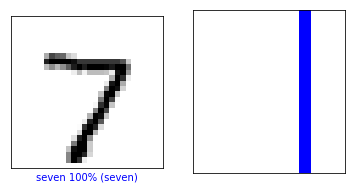

In [26]:
i = 0
plt.figure(figsize=(6,3))
plt.subplot(1,2,1)
plot_image(i, predictions, test_labels, test_images)
plt.subplot(1,2,2)
plot_value_array(i, predictions,  test_labels)
plt.show()

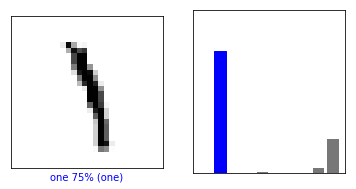

In [27]:
i = 96
plt.figure(figsize=(6,3))
plt.subplot(1,2,1)
plot_image(i, predictions, test_labels, test_images)
plt.subplot(1,2,2)
plot_value_array(i, predictions,  test_labels)
plt.show()

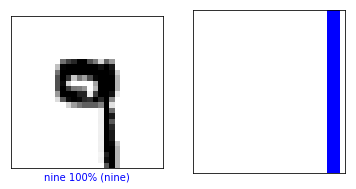

In [28]:
i = 6000
plt.figure(figsize=(6,3))
plt.subplot(1,2,1)
plot_image(i, predictions, test_labels, test_images)
plt.subplot(1,2,2)
plot_value_array(i, predictions,  test_labels)
plt.show()

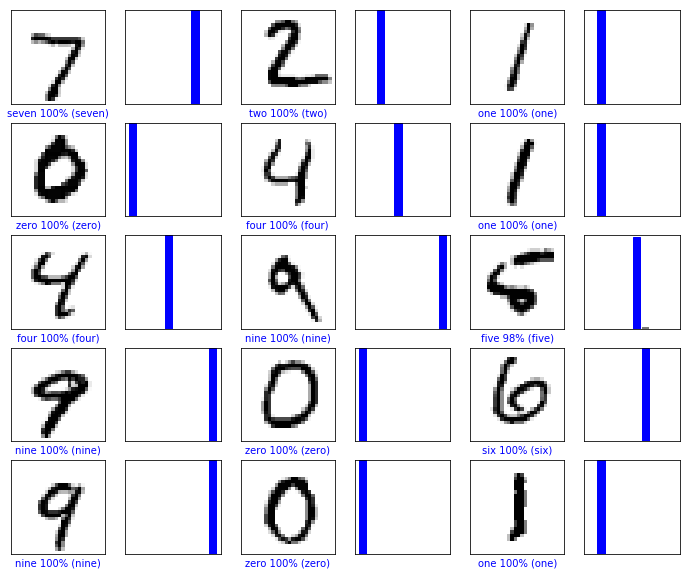

In [29]:
# Plot the first X test images, their predicted label, and the true label
# Color correct predictions in blue, incorrect predictions in red
num_rows = 5
num_cols = 3
num_images = num_rows*num_cols
plt.figure(figsize=(2*2*num_cols, 2*num_rows))
for i in range(num_images):
  plt.subplot(num_rows, 2*num_cols, 2*i+1)
  plot_image(i, predictions, test_labels, test_images)
  plt.subplot(num_rows, 2*num_cols, 2*i+2)
  plot_value_array(i, predictions, test_labels)
plt.show()

In [30]:
# Grab an image from the test dataset
img = test_images[0]

print(img.shape)

(28, 28)


In [31]:
# Add the image to a batch where it's the only member.
img = (np.expand_dims(img,0))

print(img.shape)

(1, 28, 28)


In [32]:
predictions_single = model.predict(img)

print(predictions_single)

[[1.0442481e-10 6.7817446e-10 1.3725034e-08 1.7335466e-06 1.7459615e-16
  4.9335469e-10 1.8482641e-17 9.9999774e-01 1.8827576e-08 4.0978765e-07]]


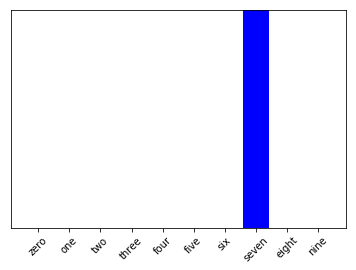

In [33]:
plot_value_array(0, predictions_single, test_labels)
_ = plt.xticks(range(10), class_names, rotation=45)

In [34]:
np.argmax(predictions_single[0])

7